In [2]:
import numpy as np
import math as meth
from random import random
from random import seed

(1797, 64)


<Figure size 432x288 with 0 Axes>

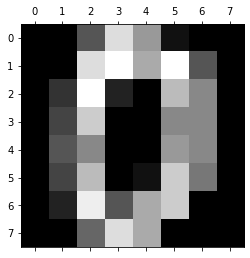

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [3]:
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

plt.show()
print(digits.data[0])

#target
pd.DataFrame(digits.target)
targ = digits.target

In [4]:
# defining constant variables:
Epsilon = 0.01
Alpha = 0.005

In [5]:
# z = theta.T * x
def sigmoid(z):
  return 1 / (1 + meth.e ** (-z))

In [6]:
# defining vector correspond to target
def convertMat(num):
  arr = []
  for i in range(0, 10):
    arr.append(1 if num == i else 0)
  return np.array(arr)[np.newaxis].T

type(convertMat(5))

numpy.ndarray

In [7]:
# defining gradient descent
def gradientDes(weightMat, Delta):
  for i in range(0, len(Delta)):
    for j in range(0, len(Delta[0])):
      weightMat[i][j] = weightMat[i][j] - Alpha * Delta[i][j]
  return weightMat

In [8]:
# defining backtracking
def backtrack(thetaT, deltaTL, aPL):
  deltaPL = np.multiply((np.matmul(thetaT.T, deltaTL)), aPL, (1 - aPL))
  return deltaPL

In [9]:
# defining the difference between the exp and ground truth
def isGreater(a, b, E):
  for i in range(0, len(a)):
    if(abs(a[i][0] - b[i][0]) > E): return True
  return False

End of methods implementation

Creating a batch with 32 elements each, with 1280 total elements (which means traversing 40 times across each batches)

In [10]:
# Creating random weight
np.random.seed(4)
weightMat1 = np.random.randint(-2, 3, (32, 64))/100
biasWeight1 = (np.random.randint(-2, 3, (32, 1))/100).reshape(1, 32)
weightMat2 = np.random.randint(-2, 3, (10, 32))/100
biasWeight2 = (np.random.randint(-2, 3, (10, 1))/100).reshape(1, 10)
print(weightMat1.shape)
print(biasWeight1.shape)
print(np.insert(weightMat1, 0, biasWeight1, axis=1).shape)

(32, 64)
(1, 32)
(32, 65)


In [11]:
# Calculating the layers prediction
# With 1 example only
# 3 layers
np.random.seed(3)
epoch = 0
cnt = 0

while(epoch < 100):
  #Creating a input matrix
  a1 = np.array(digits.data[0])[np.newaxis].T
  y = convertMat(targ[0])
  runOnce = True
  tmp_a3 = []
  batch = 33

  for i in range(1, 1281):
    a1 = np.append(a1, np.array(digits.data[i])[np.newaxis].T, axis=1)
    y = np.append(y, convertMat(targ[i]), axis=1)
    if(i % (batch - 1) != 0): continue

    runOnce = True
    # runOnce or isGreater(a3, y, Epsilon)
    # each batch gonna foward and backward propagate from here
    a2 = np.matmul(np.insert(weightMat1, 0, biasWeight1, axis=1), np.append(np.ones((1, batch), int), a1, axis=0)) # 2nd layer
    a2 = sigmoid(a2)

    if(not runOnce):
      tmp_a3 = a3
    else:
      tmp_a3 = y
    a3 = np.matmul(np.insert(weightMat2, 0, biasWeight2, axis=1), np.append(np.ones((1, batch), int), a2, axis=0)) # 3rd layer
    a3 = sigmoid(a3)
    print(len(a3[0]))

    delta3 = np.array(a3) - y
    delta2 = backtrack(weightMat2, delta3, np.array(a2))

    Delta2 = np.matmul(delta3, a2.T)
    weightMat2 = gradientDes(weightMat2, Delta2)
    Delta1 = np.matmul(delta2, a1.T)
    weightMat1 = gradientDes(weightMat1, Delta1)

    cnt += 1
    runOnce = False

    #end of while loop
    #reseting the input and the desire output
    print("looped!", i/32)
    a1 = np.array(digits.data[i])[np.newaxis].T
    y = convertMat(targ[i])
    if(i <= 1280):
      i += 1
    elif(i > 1280 and cnt < 40):
      if(len(a3) < 33):
        i = 1
      else:
        a1 = np.array(digits.data[i])[np.newaxis].T
        y = convertMat(targ[i])
    else:
      i = np.random.randint(0, 1280 + 1)
      break

  epoch += 1
  cnt = 0

print("conv after:", cnt)
cnt = 0

33
looped! 1.0
33
looped! 2.0
33
looped! 3.0
33
looped! 4.0
33
looped! 5.0
33
looped! 6.0
33
looped! 7.0
33
looped! 8.0
33
looped! 9.0
33
looped! 10.0
33
looped! 11.0
33
looped! 12.0
33
looped! 13.0
33
looped! 14.0
33
looped! 15.0
33
looped! 16.0
33
looped! 17.0
33
looped! 18.0
33
looped! 19.0
33
looped! 20.0
33
looped! 21.0
33
looped! 22.0
33
looped! 23.0
33
looped! 24.0
33
looped! 25.0
33
looped! 26.0
33
looped! 27.0
33
looped! 28.0
33
looped! 29.0
33
looped! 30.0
33
looped! 31.0
33
looped! 32.0
33
looped! 33.0
33
looped! 34.0
33
looped! 35.0
33
looped! 36.0
33
looped! 37.0
33
looped! 38.0
33
looped! 39.0
33
looped! 40.0
33
looped! 1.0
33
looped! 2.0
33
looped! 3.0
33
looped! 4.0
33
looped! 5.0
33
looped! 6.0
33
looped! 7.0
33
looped! 8.0
33
looped! 9.0
33
looped! 10.0
33
looped! 11.0
33
looped! 12.0
33
looped! 13.0
33
looped! 14.0
33
looped! 15.0
33
looped! 16.0
33
looped! 17.0
33
looped! 18.0
33
looped! 19.0
33
looped! 20.0
33
looped! 21.0
33
looped! 22.0
33
looped! 23.0
33
looped!

C:\Users\vtminh\AppData\Local\Temp\ipykernel_23360\238581354.py:3: RuntimeWarning: overflow encountered in power
  return 1 / (1 + meth.e ** (-z))


33
looped! 19.0
33
looped! 20.0
33
looped! 21.0
33
looped! 22.0
33
looped! 23.0
33
looped! 24.0
33
looped! 25.0
33
looped! 26.0
33
looped! 27.0
33
looped! 28.0
33
looped! 29.0
33
looped! 30.0
33
looped! 31.0
33
looped! 32.0
33
looped! 33.0
33
looped! 34.0
33
looped! 35.0
33
looped! 36.0
33
looped! 37.0
33
looped! 38.0
33
looped! 39.0
33
looped! 40.0
33
looped! 1.0
33
looped! 2.0
33
looped! 3.0
33
looped! 4.0
33
looped! 5.0
33
looped! 6.0
33
looped! 7.0
33
looped! 8.0
33
looped! 9.0
33
looped! 10.0
33
looped! 11.0
33
looped! 12.0
33
looped! 13.0
33
looped! 14.0
33
looped! 15.0
33
looped! 16.0
33
looped! 17.0
33
looped! 18.0
33
looped! 19.0
33
looped! 20.0
33
looped! 21.0
33
looped! 22.0
33
looped! 23.0
33
looped! 24.0
33
looped! 25.0
33
looped! 26.0
33
looped! 27.0
33
looped! 28.0
33
looped! 29.0
33
looped! 30.0
33
looped! 31.0
33
looped! 32.0
33
looped! 33.0
33
looped! 34.0
33
looped! 35.0
33
looped! 36.0
33
looped! 37.0
33
looped! 38.0
33
looped! 39.0
33
looped! 40.0
33
looped! 1.0
33

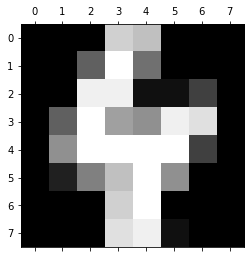

In [12]:
num = 270
li = [weightMat1, weightMat2]
a = np.array(digits.data[num])[np.newaxis].T
plt.matshow(digits.images[num])

In [13]:
res = np.matmul(weightMat2, np.matmul(weightMat1, a))
max = 0.0001
index = 0
for i in range(0, 10):
  if(res[i] > max): 
    max = res[i]
    index = i
print("predicting number to be:", index)
print(res)

predicting number to be: 4
[[   7312.04082625]
 [ -27964.01171921]
 [-331520.42851115]
 [-155099.43405571]
 [ 217603.82555682]
 [-105734.63185528]
 [ -68741.53929951]
 [   2429.13740327]
 [ -51803.70981519]
 [ -43779.65125821]]
